# word2vec

## Skipgramの確率とSGD更新式
- $P(w_j|w_i)=\frac{exp(\boldsymbol{v}_{w_j}^T \cdot \boldsymbol{v}_{w_i})}{\Sigma_k exp(\boldsymbol{v}_{w_k}^T \cdot \boldsymbol{v}_{w_i})}$
- $\mathcal{L}=-\log P(w_j|w_i)=\log \sigma(\boldsymbol{v}_{w_j}^T \cdot \boldsymbol{v}_{w_i})+\Sigma_k \mathbb{E}_{w_k \sim P_n(w)} \lbrack \log \sigma(\boldsymbol{v}_{w_k}^T \cdot \boldsymbol{v}_{w_i}) \rbrack$
- $\frac{\partial \sigma}{\partial v_{w_{il}}}=(1-\sigma)v_{w_{jl}}$
- $v_{w_{il}}=v_{w_{il}}-\eta\frac{\partial \sigma}{\partial v_{w_{il}}}$

# fasttextを利用してみる

In [1]:
import gensim

In [2]:
# ダウンロードに時間がかかります
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ja.300.vec.gz

In [3]:
model_path = "./cc.ja.300.vec.gz"

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

In [5]:
model["男"]

array([-7.250e-02,  4.950e-02,  2.216e-01,  1.731e-01, -1.489e-01,
        5.770e-02,  6.400e-02,  5.000e-04, -1.998e-01,  2.172e-01,
       -1.000e-03,  2.410e-02,  2.460e-02, -1.641e-01, -2.580e-01,
        1.467e-01, -1.536e-01, -1.174e-01, -2.722e-01,  1.361e-01,
        1.074e-01, -1.690e-02, -1.602e-01,  1.441e-01,  1.135e-01,
       -2.680e-02,  3.359e-01, -2.098e-01, -1.510e-02,  9.730e-02,
        1.389e-01, -1.280e-02,  3.982e-01,  1.149e-01,  1.418e-01,
        1.240e-01,  1.217e-01, -4.200e-03,  5.070e-02,  1.453e-01,
        5.310e-02,  7.490e-02, -1.332e-01,  8.720e-02,  1.234e-01,
        8.880e-02, -2.723e-01,  8.850e-02, -7.150e-02, -1.723e-01,
       -3.750e-02,  1.670e-02,  2.300e-02, -1.363e-01,  2.100e-02,
       -8.430e-02,  2.120e-02, -2.980e-02, -1.089e-01,  6.090e-02,
        3.180e-02, -1.059e-01, -1.918e-01, -3.050e-02,  1.100e-03,
        1.076e-01, -2.138e-01, -1.150e-02, -4.830e-02,  1.163e-01,
        1.047e-01,  2.889e-01, -1.716e-01,  9.700e-03, -4.420e

In [6]:
model.most_similar(positive=['大分'])

[('日田', 0.7002456784248352),
 ('臼杵', 0.7001046538352966),
 ('別府', 0.6851471066474915),
 ('杵築', 0.679485023021698),
 ('熊本', 0.67557293176651),
 ('豊後高田', 0.6324586868286133),
 ('宇佐', 0.6283929944038391),
 ('津久見', 0.6234111189842224),
 ('福岡', 0.6224085688591003),
 ('玖珠', 0.6221795678138733)]

In [7]:
model.most_similar(positive=['王様', '女'], negative=['男'])

[('女王', 0.4983246922492981),
 ('ラジオキッズ', 0.4979418218135834),
 ('王さま', 0.49087509512901306),
 ('熟', 0.4839142858982086),
 ('王妃', 0.4745190739631653),
 ('アンナ・レオノーウェンズ', 0.4703938663005829),
 ('タプチム', 0.45472589135169983),
 ('ゲムケン', 0.4503451883792877),
 ('裸', 0.4499166011810303),
 ('お姫様', 0.4497036933898926)]

In [8]:
model.most_similar(positive=['野球', '足'], negative=['手'])

[('サッカー', 0.5615347623825073),
 ('球場', 0.5117720365524292),
 ('球技', 0.5009211897850037),
 ('バスケットボール', 0.4948384463787079),
 ('投手', 0.4849205017089844),
 ('ラグビー', 0.481327086687088),
 ('阪神タイガース', 0.4753320515155792),
 ('フットサル', 0.4710080325603485),
 ('ソフトボール', 0.4643065929412842),
 ('甲子園', 0.46347832679748535)]

In [9]:
model.most_similar(positive=['北朝鮮'], negative=['共産'])

[('マンギョンボン', 0.3760055899620056),
 ('テポドンミサイル', 0.3548067808151245),
 ('テポドン', 0.32634782791137695),
 ('ムスダンミサイル', 0.32356172800064087),
 ('KEDO', 0.32105541229248047),
 ('朝鮮民主主義人民共和国', 0.3148959279060364),
 ('ウォンサン', 0.30935126543045044),
 ('ノドン', 0.3073720633983612),
 ('ノドンミサイル', 0.305973082780838),
 ('チョン・テセ', 0.30464261770248413)]

$\overrightarrow{別府}-\overrightarrow{大分}+\overrightarrow{高崎}=\overrightarrow{？}$

In [10]:
model.most_similar(positive=['別府', '高崎'], negative=['大分'])

[('前橋', 0.6299731731414795),
 ('沼田', 0.6152731776237488),
 ('桐生', 0.6047560572624207),
 ('安中', 0.5764108896255493),
 ('渋川', 0.5719616413116455),
 ('乗附', 0.5585063695907593),
 ('熊谷', 0.5549477338790894),
 ('藤岡', 0.550536572933197),
 ('深谷', 0.5458054542541504),
 ('磯部', 0.5453671216964722)]

In [11]:
wslist = model.most_similar(positive=["別府"], topn=100)

## スイスロールデータのt-SNEによる可視化

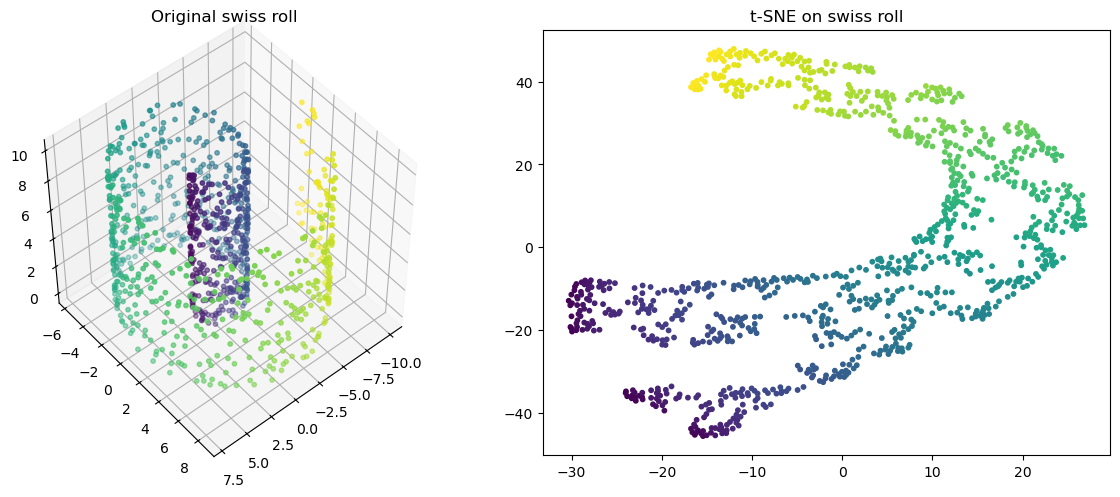

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D   # 3D 描画用

# ---------------------------
# 1. スイスロールデータ生成
# ---------------------------
npt = 1000
t = np.linspace(0, 2 * np.pi * 1.5, npt)
r = np.linspace(1, 10, npt)

x = r * np.cos(t)
y = r * np.sin(t)
z = np.random.rand(npt) * 10
c = np.linspace(0, 1, npt)               # カラーマップ用

# ---------------------------
# 2. t-SNE
# ---------------------------
X = np.column_stack((x, y, z))
tsne = TSNE(n_components=2, random_state=0, init="random", perplexity=30)
Y = tsne.fit_transform(X)

# ---------------------------
# 3. プロット
# ---------------------------
fig = plt.figure(figsize=(12, 5))

# 元データ（3D）
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
sc1 = ax1.scatter(x, y, z, c=c, s=10, cmap="viridis")
ax1.set_title("Original swiss roll")
ax1.view_init(elev=50, azim=50)           # view([50,50]) 相当
ax1.set_box_aspect([1, 1, 1])             # axis equal

# t-SNE 結果（2D）
ax2 = fig.add_subplot(1, 2, 2)
sc2 = ax2.scatter(Y[:, 0], Y[:, 1], c=c, s=10, cmap="viridis")
ax2.set_title("t-SNE on swiss roll")

plt.tight_layout()
plt.show()

# ランダムウォーク

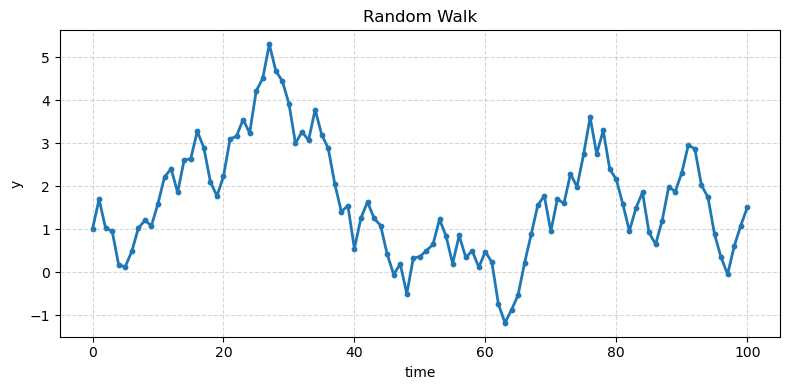

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ------------- パラメータ ------------------
n_steps = 100             # 時間ステップ数
start_value = 1.0         # 初期値 y(0)
step_min, step_max = -1, 1  # 増減幅（乱数の下限・上限）
# ------------------------------------------

# 乱数でステップを生成（–1〜1 の一様分布）
steps = np.random.uniform(step_min, step_max, size=n_steps)

# 累積和を取ってランダムウォークに変換し、初期値を加算
y = np.concatenate([[start_value], start_value + np.cumsum(steps)])
t = np.arange(len(y))  # 時間軸 0,1,2,...

# プロット
plt.figure(figsize=(8, 4))
plt.plot(t, y, lw=2)
plt.scatter(t, y, s=10)           # 点を打って離散感を出す
plt.title("Random Walk")
plt.xlabel("time")
plt.ylabel("y")
plt.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

# node2vecの実行

In [31]:
import torch
from torch_geometric.nn import Node2Vec

In [38]:
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

data = KarateClub()[0]

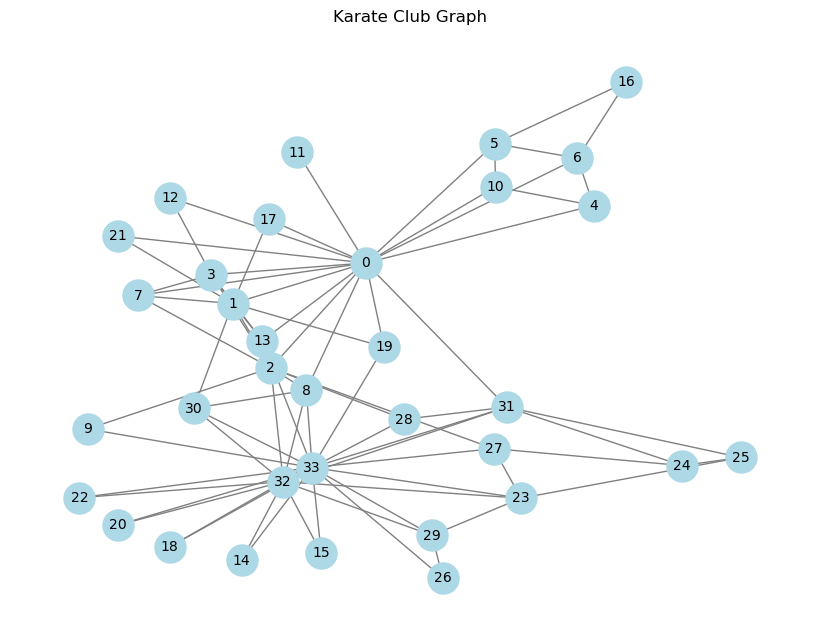

In [39]:
# PyG のデータを NetworkX に変換
G = to_networkx(data, to_undirected=True)

# 可視化（ラベル付き）
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # ノードの位置を自動配置

# ノードとエッジを描画
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

plt.title("Karate Club Graph")
plt.show()

In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Node2Vec(
    data.edge_index,
    embedding_dim=2,
    walks_per_node=10,
    walk_length=10,
    context_size=5,
    p=1.0,
    q=0.5,
    num_negative_samples=1,
).to(device)

In [46]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loader = model.loader(batch_size=128, shuffle=False, num_workers=4)
pos_rw, neg_rw = next(iter(loader))

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)
    
    
z1 = model()  # Full node-level embeddings.
z2 = model(torch.tensor([0, 1, 2]))  # Embeddings of first three nodes.

print(model)
print(z1.shape)
print(z2.shape)

Node2Vec(34, 2)
torch.Size([34, 2])
torch.Size([3, 2])


In [50]:
for epoch in range(0, 501):
    loss = train()
    if epoch % 10 == 0:
        print(loss)

1.3420294523239136
1.3130605220794678
1.320587396621704
1.2921967506408691
1.2790559530258179
1.2701797485351562
1.2588963508605957
1.228366732597351
1.2286324501037598
1.223703384399414
1.2133088111877441
1.227839708328247
1.223656177520752
1.2138535976409912
1.2140305042266846
1.2075679302215576
1.1978296041488647
1.1903693675994873
1.2022079229354858
1.1861770153045654
1.1854519844055176
1.195206642150879
1.1757428646087646
1.1955249309539795
1.1786959171295166
1.1872873306274414
1.1719064712524414
1.1837639808654785
1.1753071546554565
1.1869862079620361
1.1928850412368774
1.1707732677459717
1.1684156656265259
1.1864458322525024
1.1679089069366455
1.1626477241516113
1.1910380125045776
1.184390902519226
1.1837095022201538
1.180029034614563
1.1778573989868164
1.1694611310958862
1.1824109554290771
1.175001621246338
1.174504041671753
1.1851098537445068
1.1706312894821167
1.1715121269226074
1.1836730241775513
1.1617095470428467
1.1712687015533447


In [51]:
import numpy as np

X = model().detach().numpy()

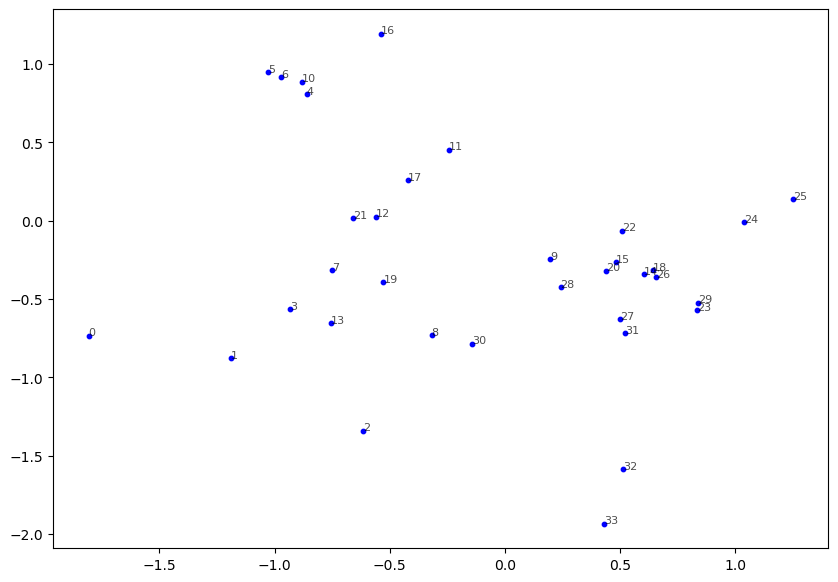

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.scatter(X[:, 0], X[:, 1], c='blue', s=10)
for i in range(len(X)):
    plt.annotate(str(i), (X[i, 0], X[i, 1]), fontsize=8, color='black', alpha=0.7)

#plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.show()